<a href="https://colab.research.google.com/github/canalrafael/Pre-Doc/blob/main/descent_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import time
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

torch.Size([100, 1])
torch.Size([100, 1])


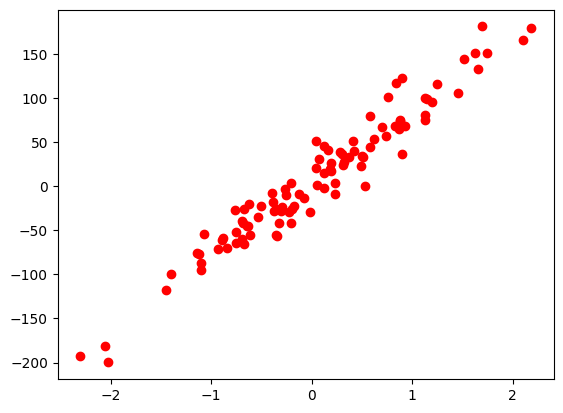

In [8]:
# DATA
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

print(x.shape)
print(y.shape)

plt.plot(x_numpy, y_numpy, 'ro')

In [9]:
# DE MODELO
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

In [10]:
# COST FUNCTION AND OPTIMIZER
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print (model.parameters())

<generator object Module.parameters at 0x0000014E3B06E960>


Epoch:  9
Custo: 2450.28417968750000000000
Coeficientes: 
m: 31.43824958801269531250
m (gradiente): -81.65791320800781250000
b: 4.05223226547241210938
b (gradiente): -6.41590690612792968750


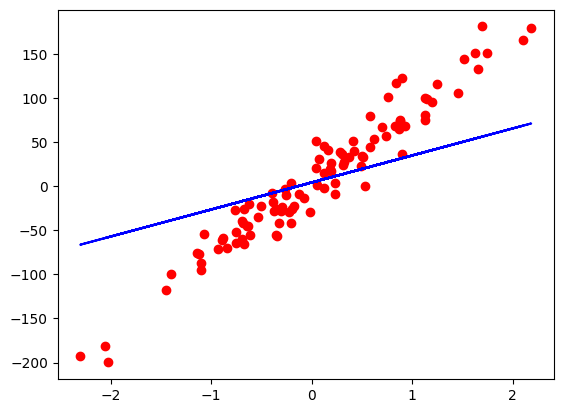

Epoch:  19
Custo: 1871.89990234375000000000
Coeficientes: 
m: 38.92567825317382812500
m (gradiente): -69.61430358886718750000
b: 4.57844543457031250000
b (gradiente): -4.40137863159179687500


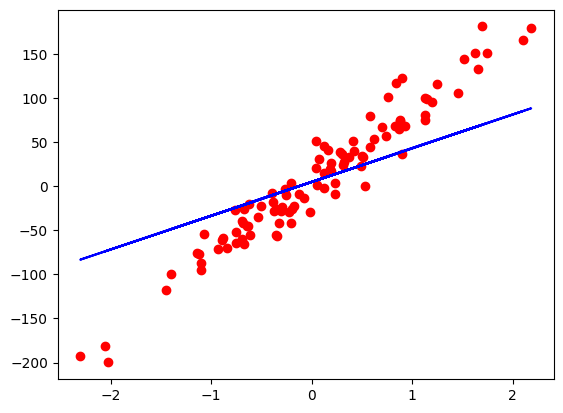

Epoch:  29
Custo: 1452.28186035156250000000
Coeficientes: 
m: 45.30943298339843750000
m (gradiente): -59.35802078247070312500
b: 4.93129348754882812500
b (gradiente): -2.87932085990905761719


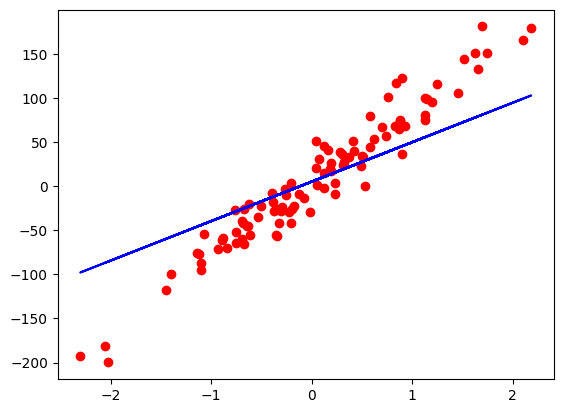

Epoch:  39
Custo: 1147.58557128906250000000
Coeficientes: 
m: 50.75319671630859375000
m (gradiente): -50.62179183959960937500
b: 5.15384960174560546875
b (gradiente): -1.74126648902893066406


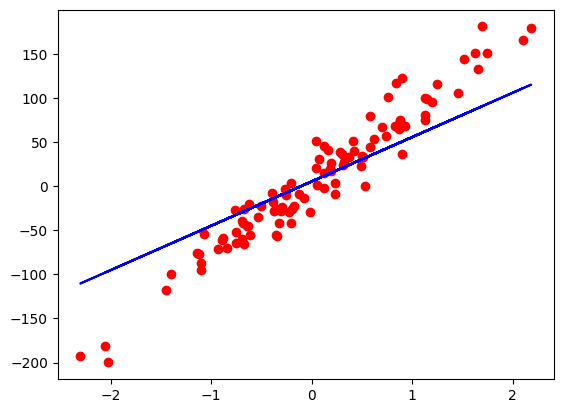

Epoch:  49
Custo: 926.16040039062500000000
Coeficientes: 
m: 55.39617919921875000000
m (gradiente): -43.17869567871093750000
b: 5.27962350845336914062
b (gradiente): -0.90133059024810791016


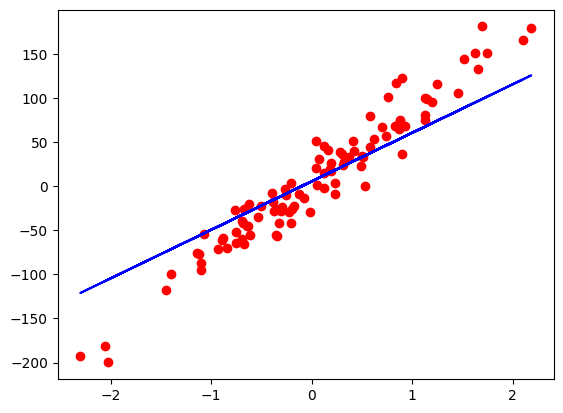

Epoch:  59
Custo: 765.13110351562500000000
Coeficientes: 
m: 59.35683441162109375000
m (gradiente): -36.83601379394531250000
b: 5.33456516265869140625
b (gradiente): -0.29167234897613525391


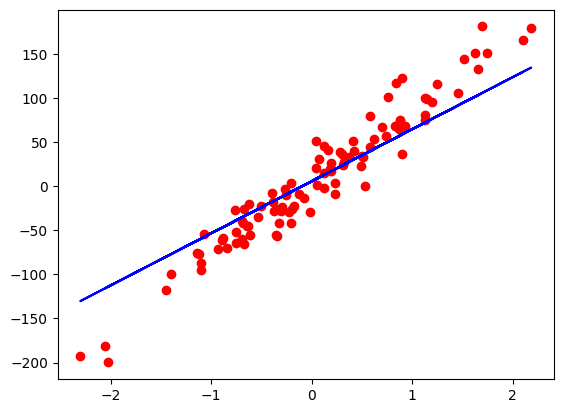

Epoch:  69
Custo: 647.94506835937500000000
Coeficientes: 
m: 62.73598098754882812500
m (gradiente): -31.42994880676269531250
b: 5.33865690231323242188
b (gradiente): 0.14115250110626220703


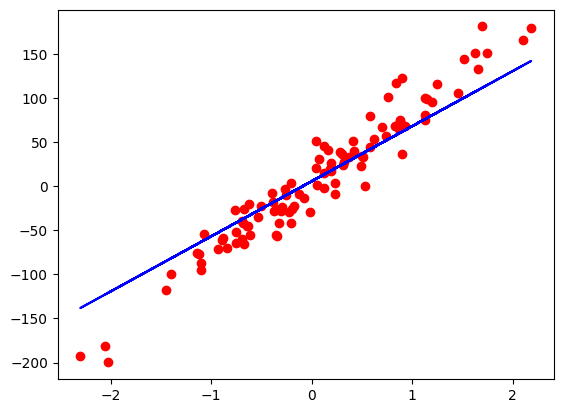

Epoch:  79
Custo: 562.61169433593750000000
Coeficientes: 
m: 65.61944580078125000000
m (gradiente): -26.82126808166503906250
b: 5.30718803405761718750
b (gradiente): 0.43913674354553222656


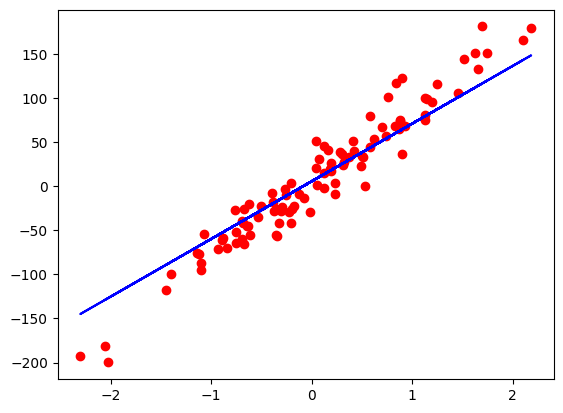

Epoch:  89
Custo: 500.43850708007812500000
Coeficientes: 
m: 68.08028411865234375000
m (gradiente): -22.89168739318847656250
b: 5.25176811218261718750
b (gradiente): 0.63514590263366699219


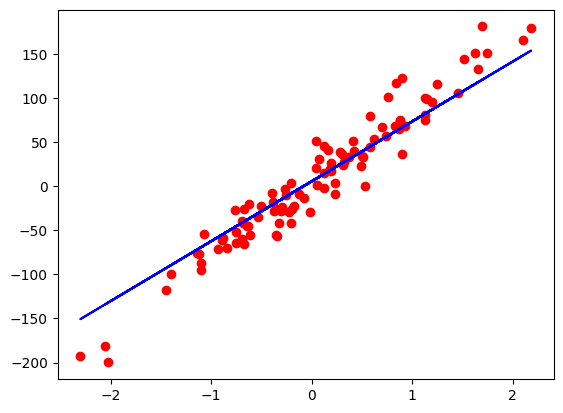

Epoch:  99
Custo: 455.11569213867187500000
Coeficientes: 
m: 70.18074035644531250000
m (gradiente): -19.54049682617187500000
b: 5.18113183975219726562
b (gradiente): 0.75483268499374389648


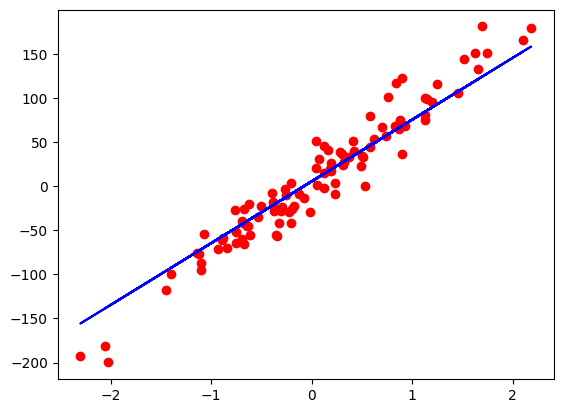

In [14]:
# TRAINING LOOP
num_epochs = 100
contador_custo = []
for epoch in range(num_epochs):
  #forward pass and loos
  y_hat = model(x)
  loss = criterion(y_hat, y)
  contador_custo.append(loss)

  #backward pass (calculed grad)
  loss.backward()

  #update (update weight)
  optimizer.step()

  if (epoch+1)%10 == 0:
      print('Epoch: ', epoch)
      print('Custo: {:.20f}'.format(loss.item()))
      print('Coeficientes: ')
      print('m: {:.20f}'.format(model.weight.data.detach().item()))
      print('m (gradiente): {:.20f}'.format(model.weight.grad.detach().item()))
      print('b: {:.20f}'.format(model.bias.data.detach().item()))
      print('b (gradiente): {:.20f}'.format(model.bias.grad.detach().item()))
      #for p in model.parameters():
      #  print('{:.2f}'.format(p.data.detach().item()))
      #  print('{:.2f}'.format(p.grad.detach().item()))
      previsao_final = y_hat.detach().numpy()
      plt.plot(x_numpy, y_numpy, 'ro')
      plt.plot(x_numpy, previsao_final, 'b')
      plt.show()

  #clean optimizer
  optimizer.zero_grad()

COST FUNCTION GRAPHIC


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

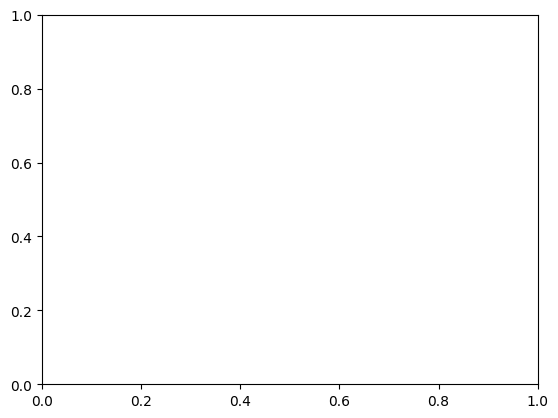

In [12]:
# PLOT OF COST FUNCTION
print("COST FUNCTION GRAPHIC")
plt.plot(contador_custo, 'b')
plt.show()